In [1]:
import pandas as pd
import numpy as np
import csv

# Cargamos el fichero de datos en un DataFrame

In [3]:
df=pd.read_csv("./data/raw/train.csv",sep=",")
df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Vemos los datos y analizamos para limpiarlos

In [4]:
df.shape

(15289, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

Ver si hay valores nulos:

In [6]:
df.isna().sum()


id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

Nombres de las columnas iniciales:

In [7]:
df.keys()

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

### Preparamos el conjunto de datos de entrada

Transformaciones en el conjunto de datos de entrada:
1. Eliminamos columnas innecesarias (no se puede aprender nada de ellas-"id")
2. Viendo que hay 6 variables que tienen muy poco peso, decido también quitarlas

In [8]:
def prepare_data(df):
    df.drop("id",axis=1,inplace=True)
    df.drop("MaxOfUpperTRange",axis=1,inplace=True)
    df.drop("MinOfUpperTRange",axis=1,inplace=True)
    df.drop("AverageOfUpperTRange",axis=1,inplace=True)
    df.drop("MaxOfLowerTRange",axis=1,inplace=True)
    df.drop("MinOfLowerTRange",axis=1,inplace=True)
    df.drop("AverageOfLowerTRange",axis=1,inplace=True)
    return df


In [9]:
df = prepare_data(df)

In [10]:
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [11]:
df.shape

(15289, 11)

### Miramos la correlación entre distintas variables

Analizamos la correlación del target (yield) con las variables:

<AxesSubplot:>

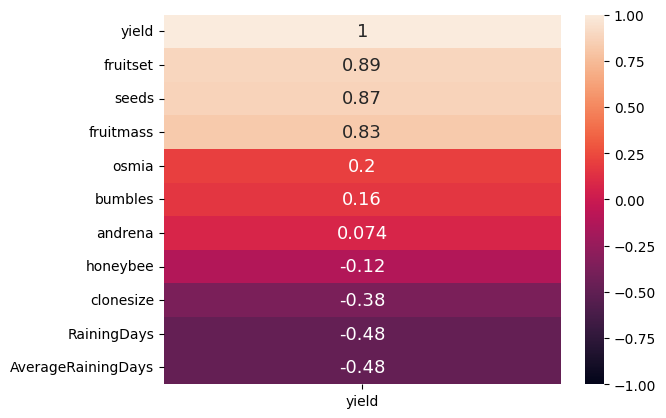

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr()[['yield']].sort_values(by='yield', ascending=False), vmin=-1, vmax=1, annot=True, annot_kws={"size":13})


### Definimos variables y separamos en train y test para entrenar modelo

In [13]:
from sklearn.model_selection import train_test_split

X = df[["fruitset", 'seeds', "fruitmass", 'osmia', 'bumbles', 'andrena', 'honeybee', 'clonesize', 'RainingDays', "AverageRainingDays"]]
y = df["yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Probamos con un modelo de regresión lineal

In [15]:
from sklearn.linear_model import LinearRegression

linealmodel=LinearRegression()
linealmodel.fit(X_train, y_train)

LinearRegression()

In [16]:
y_hat = linealmodel.predict(X_test)
y_hat

array([7622.73006676, 7241.31138665, 6731.97792249, ..., 4363.75351367,
       8291.57236103, 8039.66274324])

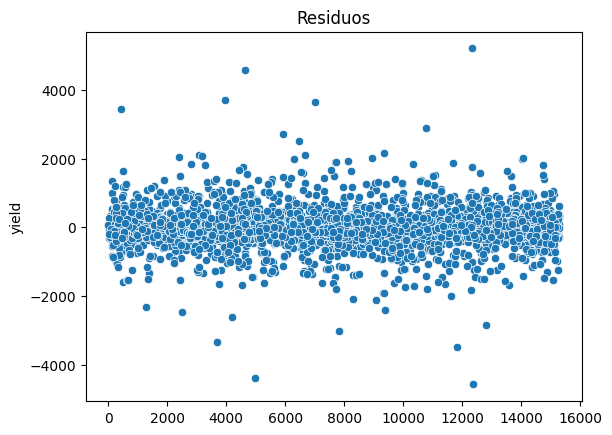

In [18]:
res = y_test - y_hat
sns.scatterplot(res)
plt.title("Residuos");

<AxesSubplot:xlabel='yield', ylabel='Count'>

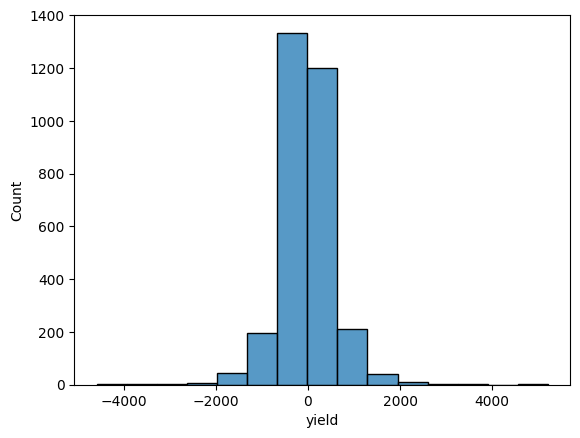

In [19]:
sns.histplot(res, bins=15)

In [20]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_hat)

print("MAE:", mae)

MAE: 370.02801119900954


### Creamos el fichero de soluciones generado por nuestro modelo para enviar a Kaggle

In [54]:
def generate_submision_df(columns):
    df_test = pd.read_csv('./data/raw/test.csv',sep=",")
    X_sub = df_test[["fruitset", 'seeds', "fruitmass", 'osmia', 'bumbles', 'andrena', 'honeybee', 'clonesize', 'RainingDays', "AverageRainingDays"]]
    X_sub = X_sub[columns.values]
    
    return X_sub

In [59]:
def generate_submission_file(model, X, submission_number):
    df_test = pd.read_csv('./data/raw/test.csv', sep=",")
    y = model.predict(X)
    df_test["y_test"] = y
    df_sub = pd.DataFrame({'Id': df_test['id'], 'yield': y})
    df_sub.to_csv(f"submissions/submission_{submission_number}.csv", index=False)

In [60]:
X_sub = generate_submision_df(X_train.columns)
generate_submission_file(linealmodel, X_sub, 1)